# VT2

In [31]:
# Import of Packages
import numpy as np
import pandas as pd
import statistics as st
import time

# Import of Packages for Functions
import math
import matplotlib.pyplot as plt
import sys

# Importing the Functions File
import Functions_VT2 as fn

# Importing Packets for the Genetic Algorithm
import random
from deap import base, creator, tools

# Start of Timer to Measure Runtime
start_time = time.time()

## Scenario Generation
Parameters

In [32]:
Param = {
    "Dt0": 22561132,  # Demand at t0
    "dt": 1,  # Steptime in Years
    "Fth": 20,  # Time Horizon of Forecasts in Steptime
    "Forecasts": 1000,  # Number of Forecasts
    "mu": 0.042754330256447565,
    "sigma": 0.05813761525452841,
    "r_D": 0.1,  # Revenues per Unit of Demand per Period
    "r_K": 1,  # Revenues per Unit of Capacity per Period
    "r_K_rent": 0.1,  # Rental Revenues per Unit of Capacity per Period
    "co_K": 0.34,  # Operational costs per unit of capacity per period
    "co_D": 0.1,  # Operational cost per unit of demand per period
    "ci_K": 600000,  # Installation cost per unit of capacity
    "discount": 0.05,  # Discount factor
    "EoS": 0.9,  # EoS factor
    "delta_K0": 0,  # Initial Value for delta_K
    "h": 1,  # h
    "K0": 25000000,  # Initial Capacity
    "p_dock": 0.7,  # Percentage of Pax using Dock Stands rather than Bus Gates
    "p_schengen": 0.7,  # Percentage of Pax travelling within Schengen Area
    "p_Dok_A_B": 0.5,  # Percentage of Pax travelling from Dock
    "PAXATM": 150,  # average number of passengers carried per air traffic movement
    "delta_K": np.array([0, 0, 0, 0, 5, 0, 0, 0, 0, 10, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0]),
    "allowed_values": np.array([0, 4, 6, 8, 10]),
    "population": 1000,
    "DHL_factor_20": 0.0003,
    "lower_theta": 9000000,
    "upper_theta": 10000000,
    "stepsize_theta": 100000,
    "lower_cond": -1000000,
    "upper_cond": 0,
    "stepsize_cond": 5000,
}

# # Paremeters von Wate:
# r_D = 0.1  # Revenues per Unit of Demand per Period
# r_K = 7  # Revenues per Unit of Capacity per Period
# r_K_rent = 0.1  # Rental Revenues per Unit of Capacity per Period
# co_K = 0.34  # Operational costs per unit of capacity per period
# co_D = 0  # Operational cost per unit of demand per period
# ci_K = 600000  # Installation cost per unit of capacity
# discount = 0.05  # Discount factor
# EoS = 0.9  # EoS factor
# delta_K0 = 0
# h = 1
# K0 = 25

# # Paremeters:
# r_D = 0.1  # Revenues per Unit of Demand per Period
# r_K = 2  # Revenues per Unit of Capacity per Period
# r_K_rent = 0.1  # Rental Revenues per Unit of Capacity per Period
# co_K = 1  # Operational costs per unit of capacity per period
# co_D = 1  # Operational cost per unit of demand per period
# ci_K = 7  # Installation cost per unit of capacity
# discount = 0.05  # Discount factor
# EoS = 0.95  # EoS factor
# delta_K0 = 0
# h = 1
# K0 = 25

Creating a Scenario

In [33]:
# Calling the Scenario Creation Function
Scenarios = fn.generate_scenarios(Param)
# Round values up for further Calculation
Demand = np.ceil(Scenarios)
# D_rounded = np.ceil(Demand / 1000000)

Geometric Brownian motion Formula

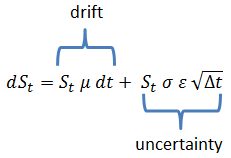

## Calulation of the ENPV

In [34]:
# Example Value for delta_K
delta_K_Example = Param["delta_K"]

K_Example = fn.Capacity(Param["K0"], delta_K_Example, Param["Forecasts"])

ENPV_Example = fn.ENPV_calculation(delta_K_Example, Param, Demand)
print("Example ENPV:", ENPV_Example)

Example ENPV: 298055077.6253967


## Optimization of the ENPV with a GA

In [35]:
Optimized_delta_K = fn.GA(Param, Demand)
print("Best individual:", Optimized_delta_K)
print("Best ENPV:", Optimized_delta_K.fitness.values[0])

Best individual: [ 0 10  0  0  0 10  0  0  0  0  4  6  0  6  0  0  4  0  0  0]
Best ENPV: 313667328.0526448


### Plot of the Optimization Results

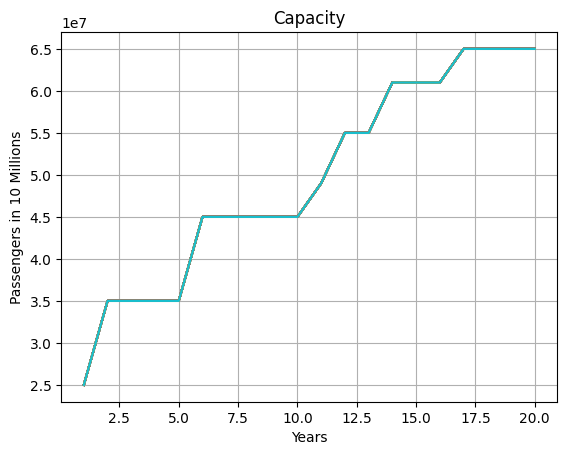

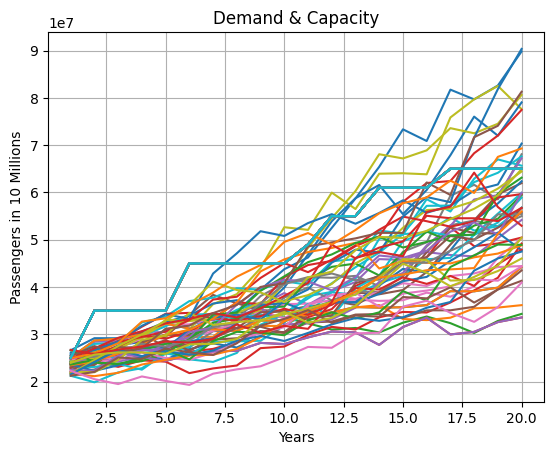

<Figure size 640x480 with 0 Axes>

In [36]:
Optimized_K = np.array(fn.Capacity(Param["K0"], Optimized_delta_K, Param["Forecasts"]))
Optimized_K_Plot = np.vstack([Demand, Optimized_K])

# Calling the Scenario Plotting Function
fn.Scenario_plot(
    Optimized_K,
    Param["Fth"],
    True,
    "Capacity",
    "Passengers in 10 Millions",
    30,
)

# Calling the Scenario Plotting Function
fn.Scenario_plot(
    Optimized_K_Plot,
    Param["Fth"],
    True,
    "Demand & Capacity",
    "Passengers in 10 Millions",
    100,
)

## Optimization of the Decision Rule

Finding the Optimal Capacity increase value with the optimal Capacity increase condition

In [37]:
ENPV_max, theta_max, condition_max = fn.Evaluation(Param, Demand)
print("Maximum ENPV:", ENPV_max)
print("Optimal theta:", theta_max)
print("Optimal condition:", condition_max)

Maximum ENPV: 319783699.01888156
Optimal theta: 9000000
Optimal condition: -550000


In [38]:
# def Evaluation(Param):
#     lower_theta = 1000000
#     upper_theta = 10000000
#     stepsize_theta = 100000
#     lower_cond = -500000
#     upper_cond = 500000
#     stepsize_cond = 50000
#     max_enpv = float("-inf")  # Initialize max ENPV to negative infinity
#     max_theta = None
#     D = Demand

#     for condition in np.arange(lower_cond, upper_cond, stepsize_cond):
#         for theta in np.arange(lower_theta, upper_theta, stepsize_theta):
#             ENPV = fn.ENPV_Flexible(theta, condition, Param, D)
#             if ENPV > max_enpv:
#                 max_enpv = ENPV
#                 max_theta = theta
#                 max_cond = condition

#     return max_enpv, max_theta, max_cond

In [39]:
# ENPV_max, theta_max, condition_max = fn.Evaluation(Param, Demand)
# print("Maximum ENPV:", ENPV_max)
# print("Corresponding theta:", theta_max)
# print("Corresponding condition:", condition_max)

Calculating the ENPV for the Flexible Case

In [40]:
delta_K_Flex = fn.Decision_Rule(Param["K0"], Demand, theta_max, condition_max)
K_Flex = fn.Capacity2(Param["K0"], delta_K_Flex)
NPV_Flex = fn.NPV_Flexible(delta_K_Flex, Param, Demand)
ENPV_Flex = fn.ENPV_Flexible(theta_max, condition_max, Param, Demand)
print("ENPV Decision Rule: ", ENPV_Flex)

ENPV Decision Rule:  319783699.01888156


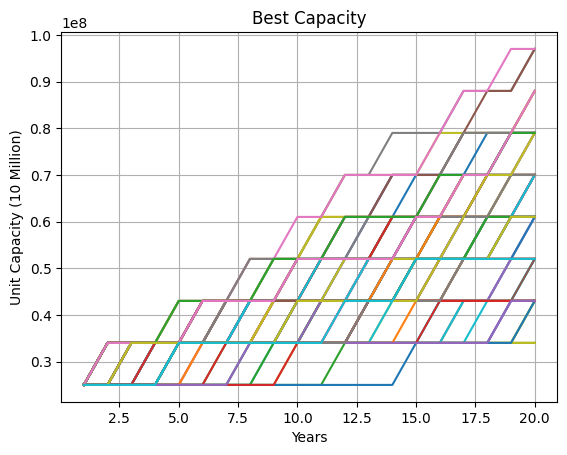

<Figure size 640x480 with 0 Axes>

In [41]:
# Calling the Scenario Plotting Function
fn.Scenario_plot(
    K_Flex,
    Param["Fth"],
    True,
    "Best Capacity",
    "Unit Capacity (10 Million)",
    90,
)

## Target Curves

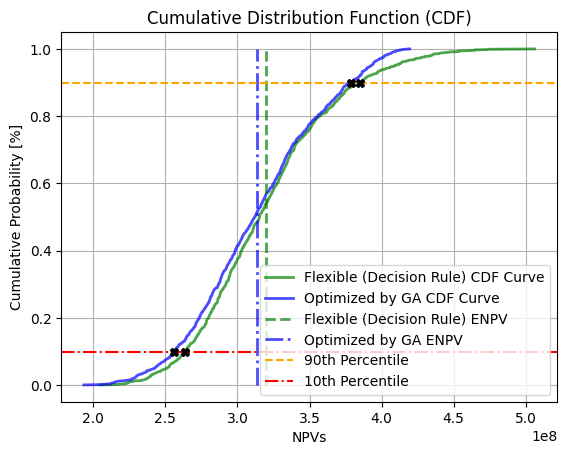

 10th Percentile Decision Rule 263595065.9280426
 90th Percentile Decision Rule 384975231.27530426
 10th Percentile Optimized by GA 255766096.52211365
 90th Percentile Optimized by GA 378719716.68349355


In [51]:
# Target Curves
Percentiles2 = fn.CDF_Plot(
    NPV_Flex,
    fn.NPV_calculation(Optimized_K, Demand, Optimized_delta_K, Param),
    "Flexible (Decision Rule)",
    "Optimized by GA",
)

# Percentiles
print(" 10th Percentile Decision Rule", Percentiles2[0])
print(" 90th Percentile Decision Rule", Percentiles2[1])
print(" 10th Percentile Optimized by GA", Percentiles2[2])
print(" 90th Percentile Optimized by GA", Percentiles2[3])

## Calculation of Dockstand Demand

Calcualtion of the Desing Hour Load (DHL) and Docking Stand Demand

In [43]:
## Contact Stand Demand (ZRH has 75, but not all can be used at once)
## Dock A has 17 Contact and 16 Bus Gates

No_Docks = fn.Dockstands(Optimized_K, Param)
print("Contactstand demad:\n", No_Docks[0])

No_Docks_Flex = fn.Dockstands(K_Flex, Param)
print("Contactstand demad in the Flexible Case:\n", No_Docks_Flex)

Contactstand demad:
 [13. 18. 18. 18. 18. 23. 23. 23. 23. 23. 25. 27. 27. 30. 30. 30. 32. 32.
 32. 32.]
Contactstand demad in the Flexible Case:
 [[13. 17. 17. ... 22. 22. 26.]
 [13. 13. 17. ... 22. 26. 26.]
 [13. 13. 13. ... 30. 30. 35.]
 ...
 [13. 13. 13. ... 26. 26. 26.]
 [13. 13. 13. ... 22. 22. 22.]
 [13. 13. 17. ... 30. 30. 35.]]


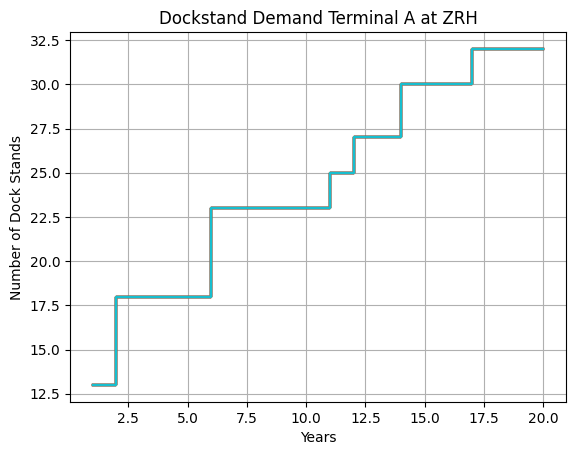

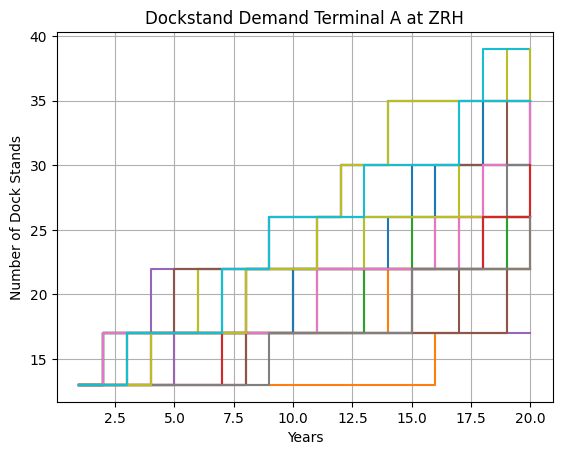

<Figure size 640x480 with 0 Axes>

In [44]:
# Calling the Scenario Plotting Function
fn.Scenario_plot(
    No_Docks,
    Param["Fth"],
    False,
    "Dockstand Demand Terminal A at ZRH",
    "Number of Dock Stands",
    30,
)

# Calling the Scenario Plotting Function
fn.Scenario_plot(
    No_Docks_Flex,
    Param["Fth"],
    False,
    "Dockstand Demand Terminal A at ZRH",
    "Number of Dock Stands",
    30,
)

### Stopping the Runtime

In [45]:
end_time = time.time()

# Calculate the Total Runtime
total_run_time = end_time - start_time

# Display the Total Runtime
print("Total Runtime =", round(total_run_time, 2), "s")

Total Runtime = 16.54 s
